In [1]:

#1 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [2]:

#2 Load dataset
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:

#3 Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

#4 Display data info
df.info()


Missing values in dataset:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9

In [9]:
#5 Separate features and target
X = df.drop('target', axis=1)
y = df['target']

#6 Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#7 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (952, 11)
Testing set size: (238, 11)


In [10]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,-0.802672,1.265039,-0.795219,-0.849792,-1.023217
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,-0.802672,0.637758,-0.795219,0.071119,0.615583
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,0.346762,-1.636136,-0.795219,-0.849792,-1.023217
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-0.802672,-1.244085,1.257515,0.531575,0.615583
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.802672,-0.695214,-0.795219,-0.849792,-1.023217
...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.932213,0.555995,-2.387770,-1.206560,0.529071,-0.520929,-0.802672,-0.303164,-0.795219,0.255301,0.615583
1186,1.526558,0.555995,0.820487,0.645180,-0.171279,1.919646,-0.802672,0.049682,-0.795219,2.281307,0.615583
1187,0.350624,0.555995,0.820487,-0.117301,-0.782852,-0.520929,-0.802672,-0.969650,1.257515,0.255301,0.615583
1188,0.350624,-1.798576,-1.318351,-0.117301,0.252877,-0.520929,1.496197,1.343449,-0.795219,-0.849792,0.615583


In [11]:
X_scaled

array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [14]:
X.shape

(1190, 11)

##  Logistic Regression — Manual Implementation (Without sklearn)

In [ ]:
#8 Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [30]:

#9 Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#10 Logistic Regression from scratch
class LogisticRegressionManual:
    def __init__(self, lr=0.01, n_iters=2500):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.ones(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            j=np.random.randint(0,n_samples)
            model = np.dot(X[j], self.weights)
            y_predicted = sigmoid(model)

            self.weights += self.lr*(np.dot((y.iloc[j] - y_predicted), X[j]))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)



In [31]:
#11 fitting model and testing on test data
mymode=LogisticRegressionManual()
mymode.fit(X_train,y_train)
y_hat= mymode.predict(X_test)
y_hat


array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [32]:
#12 Evaluation or manual model
acc_manual = accuracy_score(y_test, y_hat)
prec_manual = precision_score(y_test, y_hat)
rec_manual = recall_score(y_test, y_hat)
f1_manual = f1_score(y_test, y_hat)

print("Manual Logistic Regression Results:")
print(f"Accuracy: {acc_manual}")
print(f"Precision: {prec_manual}")
print(f"Recall: {rec_manual}")
print(f"F1-Score: {f1_manual}")

Manual Logistic Regression Results:
Accuracy: 0.8361344537815126
Precision: 0.84251968503937
Recall: 0.8492063492063492
F1-Score: 0.8458498023715415


##  Logistic Regression — Using Scikit-learn

In [33]:

#13 Train sklearn model
sk_model = LogisticRegression(max_iter=1000)
sk_model.fit(X_train, y_train)

#14 Predict
y_pred_sk = sk_model.predict(X_test)

#15 Evaluation of Sklearn model
acc_sk = accuracy_score(y_test, y_pred_sk)
prec_sk = precision_score(y_test, y_pred_sk)
rec_sk = recall_score(y_test, y_pred_sk)
f1_sk = f1_score(y_test, y_pred_sk)

print("Sklearn Logistic Regression Results:")
print(f"Accuracy: {acc_sk:.3f}")
print(f"Precision: {prec_sk:.3f}")
print(f"Recall: {rec_sk:.3f}")
print(f"F1-Score: {f1_sk:.3f}")


Sklearn Logistic Regression Results:
Accuracy: 0.840
Precision: 0.844
Recall: 0.857
F1-Score: 0.850


In [34]:

#16 Comparison Table
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Manual Implementation': [acc_manual, prec_manual, rec_manual, f1_manual],
    'Sklearn Implementation': [acc_sk, prec_sk, rec_sk, f1_sk]
})

comparison


,Metric,Manual Implementation,Sklearn Implementation
0,Accuracy,0.836134,0.840336
1,Precision,0.842520,0.843750
2,Recall,0.849206,0.857143
3,F1-Score,0.845850,0.850394


##  Confusion Matrix Visualization

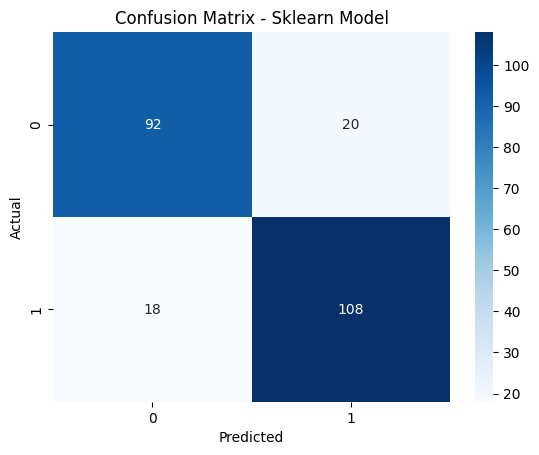

In [35]:

#17 Confusion matrix for sklearn model
cm = confusion_matrix(y_test, y_pred_sk)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Sklearn Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


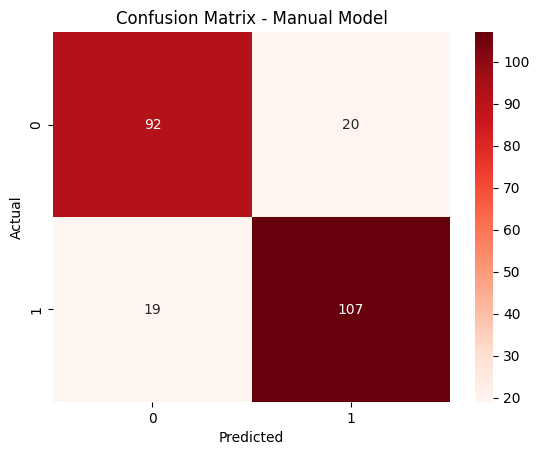

In [36]:

#18 Confusion matrix for manual model
cm_manual = confusion_matrix(y_test, y_hat)
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Manual Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
